# Apa itu Machine Learning?

- Sebuan ilmu dan seni dari:
    - Memberikan komputer kemampuan belajar mengambil keputusan dari data
    - ... tanpa harus diprogram secara expliciti
- Contoh:
    - Mempridiksi apakah email spam atau tidak
    - Mengkluster wikipedia menjadi beberapa kategori
- Supervised learning: Menggunakan data yang harus dilabeli
- Unsupervise learning: Menggunakan data yang tidak dilabeli

# Mengenal Iris Dataset

<center><h2>iris setosa</h2>
<img src='http://upload.wikimedia.org/wikipedia/commons/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg' style="height:400px" />

<center><h2>iris versicolor</h2>
<img src="http://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg" style="height:400px" />

<center><h2>iris virginica</h2>
<img src="http://upload.wikimedia.org/wikipedia/commons/9/9f/Iris_virginica.jpg" style="height:400px" />

<center><h2>Gambaran data</h2>
<img src="https://cdn-images-1.medium.com/max/1600/0*7H_gF1KnslexnJ3s" style="height:500px" />

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
Y = iris.target
print(iris.DESCR)


Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
df = pd.read_csv('iris.csv')

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
import seaborn as sns

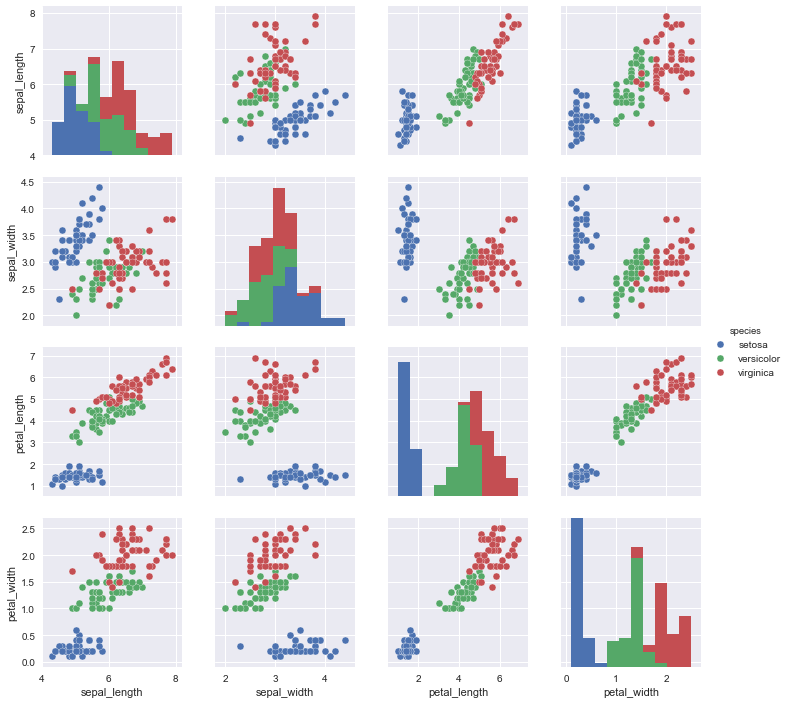

In [15]:
sns.pairplot(df, hue='species')

# KNN 

- The K-nearest neighbor or k-NN is an algorithm to recognize the pattern in a given data set without explicitly learning a model. It is a non-parametric method to predict the output value based on k closest training examples. Due to this reason, k-NN is by far the most simple supervised machine learning algorithm.
- The objective is to classify an unknown object by finding the most common class nearest to its features. For example we have a data set of four different animals (dog, cat, chicken and rat) containing their physical features and labels. We will classify the new object by looking at the class of other examples falling near to its features.

## Pros
- Simple to implement
- Training is trivial
- It can work with any number of classes
- Easy to add more data
- It has very few parameters (K and distance metric).

## Cons
- It has high computation cost.
- It is not suitable for high dimensional data and categorical features.

<img src="https://raw.githubusercontent.com/rubiagatra/data-science-with-python/dc13e9dbdd4ac58914f482f0a6af61f95dfb9b95/Bagian%207%20-%20Supervised%20Learning/img/k_nearest_neighbours.png" style="height:450px" />

<img src="https://raw.githubusercontent.com/rubiagatra/data-science-with-python/dc13e9dbdd4ac58914f482f0a6af61f95dfb9b95/Bagian%207%20-%20Supervised%20Learning/img/decision_boundary.png" style="height:400px" />

In [16]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

In [17]:
y = df['species']

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)

In [19]:
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [20]:
X.shape

(150, 4)

In [21]:
y.shape

(150,)

In [22]:
prediction = knn.predict(X)

In [23]:
pd.Series(prediction).value_counts()

setosa        50
versicolor    50
virginica     50
dtype: int64

# Mengukur model yang kita buat

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=8)


In [25]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 ['virginica' 'versicolor' 'virginica' 'virginica' 'versicolor' 'setosa'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa' 'virginica' 'setosa'
 'virginica' 'virginica' 'setosa' 'setosa' 'setosa' 'versicolor' 'setosa'
 'virginica' 'virginica' 'virginica' 'setosa' 'versicolor' 'versicolor'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'virginica' 'virginica'
 'setosa' 'setosa' 'versicolor' 'virginica' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'setosa' 'virginica'
 'versicolor']


In [26]:
knn.score(X_test, y_test)

0.9555555555555556

In [28]:
knn.predict([3, 5, 4, 2])

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array(['versicolor'], dtype=object)

# Test the KNN Model with Different K Values

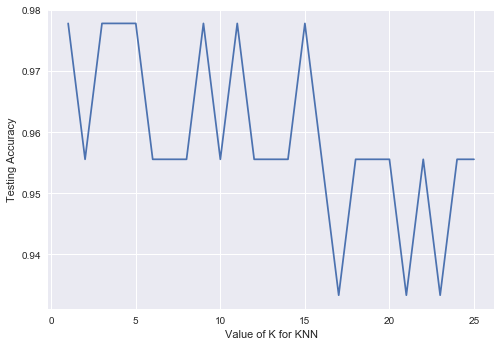

In [35]:
scores = []
k_range = range(1,26)
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(knn.score(X_test, y_test))

plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.plot(k_range, scores)

In [38]:
scores[7]

0.9555555555555556

# Error Rate the KNN Model with Different K Values

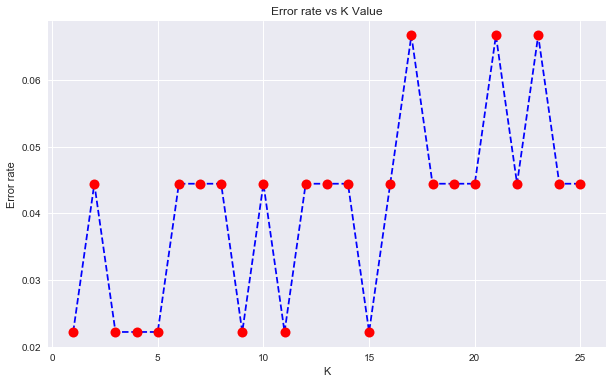

In [43]:
import numpy as np
error_rate = []

for i in range(1, 26):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(np.mean( y_pred != y_test))

plt.figure(figsize = (10, 6))
plt.plot(range(1, 26), error_rate, color='blue', linestyle = 'dashed', marker = 'o', markersize=10, markerfacecolor='red')
plt.title("Error rate vs K Value")
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()


# Test the KNN Model with Different K Values Using Confusion Matrix

In [47]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.977777777778
[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       1.00      0.93      0.97        15
  virginica       0.94      1.00      0.97        15

avg / total       0.98      0.98      0.98        45

